## Naive Bayes Classification on Dataset - 2

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/dataset_2_preprocessed.csv')
df = df.drop(columns=['id'])
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,62,70,1.0250,3.0,0.0,1,1,1,1,122.0,...,39.0,7900,3.90,0,0,1,0,1,1,0
1,54,70,1.0150,0.0,0.0,1,0,1,1,233.0,...,42.0,10600,5.15,1,0,1,0,1,1,0
2,47,80,1.0175,1.0,0.0,1,0,1,1,114.0,...,37.0,6750,4.30,0,1,1,1,1,1,0
3,43,60,1.0250,0.0,0.0,1,0,1,1,108.0,...,43.0,7200,5.50,1,1,1,0,1,1,1
4,42,100,1.0150,4.0,0.0,1,1,1,0,293.5,...,39.0,8300,4.60,0,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,46,60,1.0100,1.0,0.0,1,0,1,1,163.0,...,28.0,14600,3.20,0,0,1,0,1,1,0
258,50,90,1.0200,1.5,1.0,1,0,1,1,89.0,...,17.0,6500,4.20,0,0,1,0,0,0,0
259,23,80,1.0250,0.0,0.0,1,0,1,1,111.0,...,41.0,7200,5.00,1,1,1,0,1,1,1
260,38,80,1.0200,0.0,0.0,1,0,1,1,99.0,...,44.0,7300,6.40,1,1,1,0,1,1,1


In [ ]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,62,70,1.0250,3.0,0.0,1,1,1,1,122.0,...,39.0,7900,3.90,0,0,1,0,1,1,0
1,54,70,1.0150,0.0,0.0,1,0,1,1,233.0,...,42.0,10600,5.15,1,0,1,0,1,1,0
2,47,80,1.0175,1.0,0.0,1,0,1,1,114.0,...,37.0,6750,4.30,0,1,1,1,1,1,0
3,43,60,1.0250,0.0,0.0,1,0,1,1,108.0,...,43.0,7200,5.50,1,1,1,0,1,1,1
4,42,100,1.0150,4.0,0.0,1,1,1,0,293.5,...,39.0,8300,4.60,0,1,1,1,1,1,0


In [ ]:
df.shape

(262, 25)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             262 non-null    int64  
 1   bp              262 non-null    int64  
 2   sg              262 non-null    float64
 3   al              262 non-null    float64
 4   su              262 non-null    float64
 5   rbc             262 non-null    int64  
 6   pc              262 non-null    int64  
 7   pcc             262 non-null    int64  
 8   ba              262 non-null    int64  
 9   bgr             262 non-null    float64
 10  bu              262 non-null    float64
 11  sc              262 non-null    float64
 12  sod             262 non-null    float64
 13  pot             262 non-null    float64
 14  hemo            262 non-null    float64
 15  pcv             262 non-null    float64
 16  wc              262 non-null    int64  
 17  rc              262 non-null    flo

In [ ]:
df.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
count,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,...,262.00000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000
mean,52.351145,76.259542,1.017338,0.998092,0.496183,0.835878,0.244275,0.900763,0.938931,155.921756,...,39.51145,8279.198473,4.697328,0.625954,0.633588,0.912214,0.229008,0.812977,0.854962,0.381679
std,16.570954,14.375153,0.005532,1.323598,1.060427,0.371095,0.430479,0.299552,0.239915,78.560435,...,8.32378,2835.242178,0.923995,0.484802,0.482746,0.283525,0.420998,0.390676,0.352813,0.486728
min,6.000000,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,...,9.00000,2200.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,43.000000,70.000000,1.013125,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,103.250000,...,33.25000,6662.500000,4.062500,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
50%,55.000000,80.000000,1.017500,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,127.250000,...,41.00000,7900.000000,4.800000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
75%,65.000000,80.000000,1.020000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,177.500000,...,45.50000,9775.000000,5.300000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,490.000000,...,54.00000,26400.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [ ]:
X=df.drop(columns='classification',axis=1)
Y=df['classification']
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)
scaled_X=pd.DataFrame(scaled_X, columns=X.columns)
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X, Y, test_size=0.2,random_state=54)

In [ ]:
model = GaussianNB()  
model.fit(X_train,Y_train) 
prediction=model.score(X_test,Y_test)
print("Accuracy:",prediction)
predict=model.predict(X_test)

Accuracy: 0.9622641509433962


In [ ]:
def print_result(data):
  df = pd.DataFrame((np.array(data)).reshape(1,-1), columns=X_train.columns)
  standard_data=scaler.transform(df)
  df = pd.DataFrame(standard_data, columns=X_train.columns)
  predict=model.predict(df)
  if predict==0:
    print("You are healthy")
  else:
    print("You are suffering from Chronic Kidney Disease")

In [ ]:
data=[65,75,1.010,3,0,0,1,0,1,122,42,1.7,136,4.7,12.6,45,7900,2.8,0,0,1,0,1,1]
print_result(data)
data=[75,75,1.025,3,0,1,1,0,1,128,43,280,128,4,12.6,50,10000,2.8,1,0,1,0,1,1]
print_result(data)

You are healthy
You are healthy


In [ ]:
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score
print('Precision: %.3f' % precision_score(Y_test,predict))
print('Recall: %.3f' % recall_score(Y_test, predict))
print('Accuracy: %.3f' % accuracy_score(Y_test, predict))
print('F1-Score: %.3f' % f1_score(Y_test, predict))

Precision: 0.905
Recall: 1.000
Accuracy: 0.962
F1-Score: 0.950


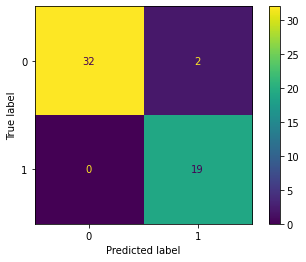

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(Y_test, predict.round())

In [ ]:
"""
Old Cleaning Code

df=df.drop(['id'],axis=1)
df=df.interpolate()
df.head(30)
final=pd.get_dummies(df['rbc'])
df=pd.concat([df,final],axis=1)
final=pd.get_dummies(df['pc'])
df=pd.concat([df,final],axis=1)
final=pd.get_dummies(df['pcc'])
df=pd.concat([df,final],axis=1)
final=pd.get_dummies(df['ba'])
df=pd.concat([df,final],axis=1)
final=pd.get_dummies(df['htn'])
df=pd.concat([df,final],axis=1)
final=pd.get_dummies(df['dm'])
df=pd.concat([df,final],axis=1)
final=pd.get_dummies(df['cad'])
df=pd.concat([df,final],axis=1)
final=pd.get_dummies(df['appet'])
df=pd.concat([df,final],axis=1)
final=pd.get_dummies(df['pe'])
df=pd.concat([df,final],axis=1)
final=pd.get_dummies(df['ane'])
df=pd.concat([df,final],axis=1)
final=pd.get_dummies(df['classification'])
df=pd.concat([df,final],axis=1)
df=df.drop(['rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane'],axis='columns')
df
df=df.fillna(method="ffill",limit=2)
df
df=df.drop(['notckd','no','poor','wc','rc','classification'],axis=1)
df
"""

'\nOld Cleaning Code\n\ndf=df.drop([\'id\'],axis=1)\ndf=df.interpolate()\ndf.head(30)\nfinal=pd.get_dummies(df[\'rbc\'])\ndf=pd.concat([df,final],axis=1)\nfinal=pd.get_dummies(df[\'pc\'])\ndf=pd.concat([df,final],axis=1)\nfinal=pd.get_dummies(df[\'pcc\'])\ndf=pd.concat([df,final],axis=1)\nfinal=pd.get_dummies(df[\'ba\'])\ndf=pd.concat([df,final],axis=1)\nfinal=pd.get_dummies(df[\'htn\'])\ndf=pd.concat([df,final],axis=1)\nfinal=pd.get_dummies(df[\'dm\'])\ndf=pd.concat([df,final],axis=1)\nfinal=pd.get_dummies(df[\'cad\'])\ndf=pd.concat([df,final],axis=1)\nfinal=pd.get_dummies(df[\'appet\'])\ndf=pd.concat([df,final],axis=1)\nfinal=pd.get_dummies(df[\'pe\'])\ndf=pd.concat([df,final],axis=1)\nfinal=pd.get_dummies(df[\'ane\'])\ndf=pd.concat([df,final],axis=1)\nfinal=pd.get_dummies(df[\'classification\'])\ndf=pd.concat([df,final],axis=1)\ndf=df.drop([\'rbc\',\'pc\',\'pcc\',\'ba\',\'htn\',\'dm\',\'cad\',\'appet\',\'pe\',\'ane\'],axis=\'columns\')\ndf\ndf=df.fillna(method="ffill",limit=2)\ndf\n